In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
data = pd.read_csv('/content/drive/MyDrive/UAVsecurity/DATASET1.csv')

In [42]:
data.dtypes

PRN         int64
DO        float64
PD        float64
RX        float64
TOW       float64
CP        float64
EC        float64
LC        float64
PC        float64
PIP       float64
PQP       float64
TCD       float64
CN0       float64
Output      int64
dtype: object

In [43]:
data["Output"].unique()

array([0, 1, 2, 3])

In [44]:
data["Output"].value_counts()

0    397825
2     44232
1     36458
3     32015
Name: Output, dtype: int64

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
label_encoder = LabelEncoder()

In [47]:
data["Output"] = label_encoder.fit_transform(data["Output"])

In [48]:
data.head()

,PRN,DO,PD,RX,TOW,CP,EC,LC,PC,PIP,PQP,TCD,CN0,Output
0,6,1160.671408,-238359.5433,491568.00,491568.0008,-24660.26329,163521.78,170008.81,179294.97,178420.33,-17688.17800,1158.4806,49.412529,0
1,6,1157.827808,-238363.9212,491568.02,491568.0208,-24683.46852,158277.05,160253.09,182106.11,182106.05,158.33333,1160.7948,49.452686,0
2,6,1161.135932,-238368.6386,491568.04,491568.0408,-24706.68736,184442.36,193125.89,208228.02,-205198.30,35391.59000,1157.6909,49.480145,0
3,6,1161.156617,-238373.3918,491568.06,491568.0608,-24729.92004,159812.45,169960.55,187550.72,187543.00,-1701.94400,1161.1343,49.433769,0
4,6,1160.690893,-238378.1271,491568.08,491568.0808,-24753.15400,183557.66,191912.58,208403.50,208330.05,-5532.89990,1161.1759,49.391670,0


In [49]:
data["Output"].value_counts()

0    397825
2     44232
1     36458
3     32015
Name: Output, dtype: int64

In [50]:
data.head()

,PRN,DO,PD,RX,TOW,CP,EC,LC,PC,PIP,PQP,TCD,CN0,Output
0,6,1160.671408,-238359.5433,491568.00,491568.0008,-24660.26329,163521.78,170008.81,179294.97,178420.33,-17688.17800,1158.4806,49.412529,0
1,6,1157.827808,-238363.9212,491568.02,491568.0208,-24683.46852,158277.05,160253.09,182106.11,182106.05,158.33333,1160.7948,49.452686,0
2,6,1161.135932,-238368.6386,491568.04,491568.0408,-24706.68736,184442.36,193125.89,208228.02,-205198.30,35391.59000,1157.6909,49.480145,0
3,6,1161.156617,-238373.3918,491568.06,491568.0608,-24729.92004,159812.45,169960.55,187550.72,187543.00,-1701.94400,1161.1343,49.433769,0
4,6,1160.690893,-238378.1271,491568.08,491568.0808,-24753.15400,183557.66,191912.58,208403.50,208330.05,-5532.89990,1161.1759,49.391670,0


In [51]:
X = data.iloc[:,0:13]
y = data.iloc[:,13]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
clf = LogisticRegression(penalty='l2', solver='sag', C=7.210172, max_iter=459)
# clf = MLPClassifier(hidden_layer_sizes=(221, 170), activation='logistic', solver='lbfgs', max_iter=954, alpha=0.001761192, early_stopping=True)



In [65]:
#to know the shape of the train and test dataset.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(408424, 13)
(408424,)
(102106, 13)
(102106,)


In [66]:
y_pred = clf.predict(X_test)
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

In [60]:
clf.classes_    #total number of classes

array([0, 1, 2, 3])

In [70]:
cm_df = pd.DataFrame(cm,
                     index = ['zero','one','two','three'], 
                     columns = ['three','two','one','zero'])

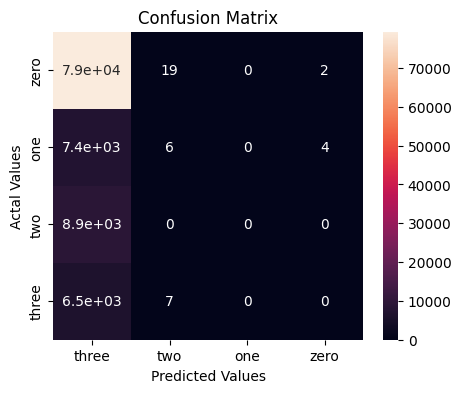

In [71]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [54]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=7.210172, max_iter=459, solver='sag')

In [63]:
#cm =confusion_matrix(X_test,y_test,labels=clf.classes_) #it can't handle with multi-class output

ValueError: ignored

In [55]:
accuracy = clf.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7770062484085166
